<a href="https://colab.research.google.com/github/Dmytro-Ostrenko/Data09/blob/AI_test/W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# нормалізація даних
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# архітектура нейромережі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# компіляція моделі
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# навчання моделі
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# оцінка точності моделі
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Точність спрощеної згорткової НМ: {test_acc:.4f}")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.3169 - loss: 1.8278 - val_accuracy: 0.4881 - val_loss: 1.3867
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.5362 - loss: 1.2896 - val_accuracy: 0.5792 - val_loss: 1.1787
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.6042 - loss: 1.1190 - val_accuracy: 0.6220 - val_loss: 1.0735
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.6440 - loss: 1.0070 - val_accuracy: 0.6455 - val_loss: 1.0026
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.6760 - loss: 0.9276 - val_accuracy: 0.6395 - val_loss: 1.0128
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.6975 - loss: 0.8630 - val_accuracy: 0.6746 - val_loss: 0.9371
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.7138 - loss: 0.8226 - val_accuracy: 0.6858 - val_loss: 0.9076
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 83ms/step - accuracy: 0.7252 - loss: 0.7873 - 

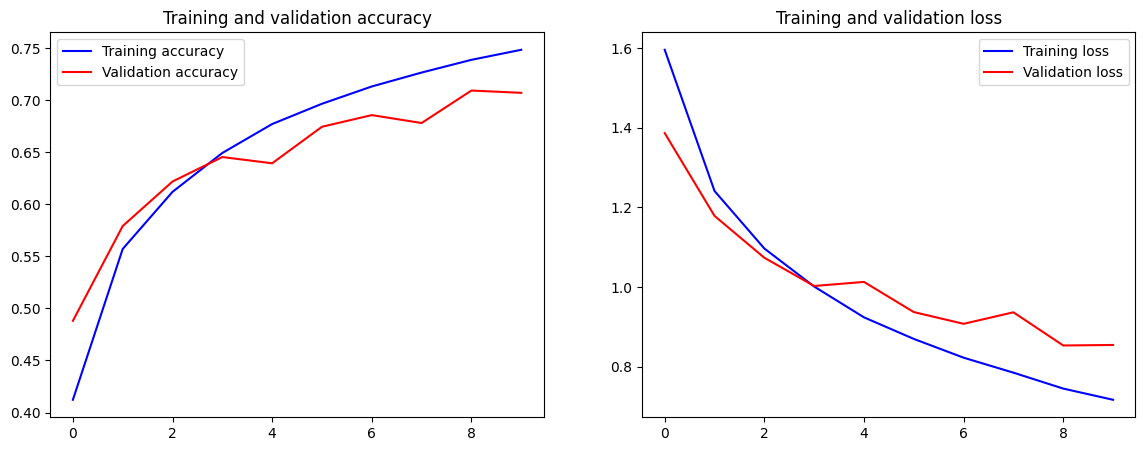

In [24]:
import matplotlib.pyplot as plt

# створення графіків точності та втрат
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_accuracy_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


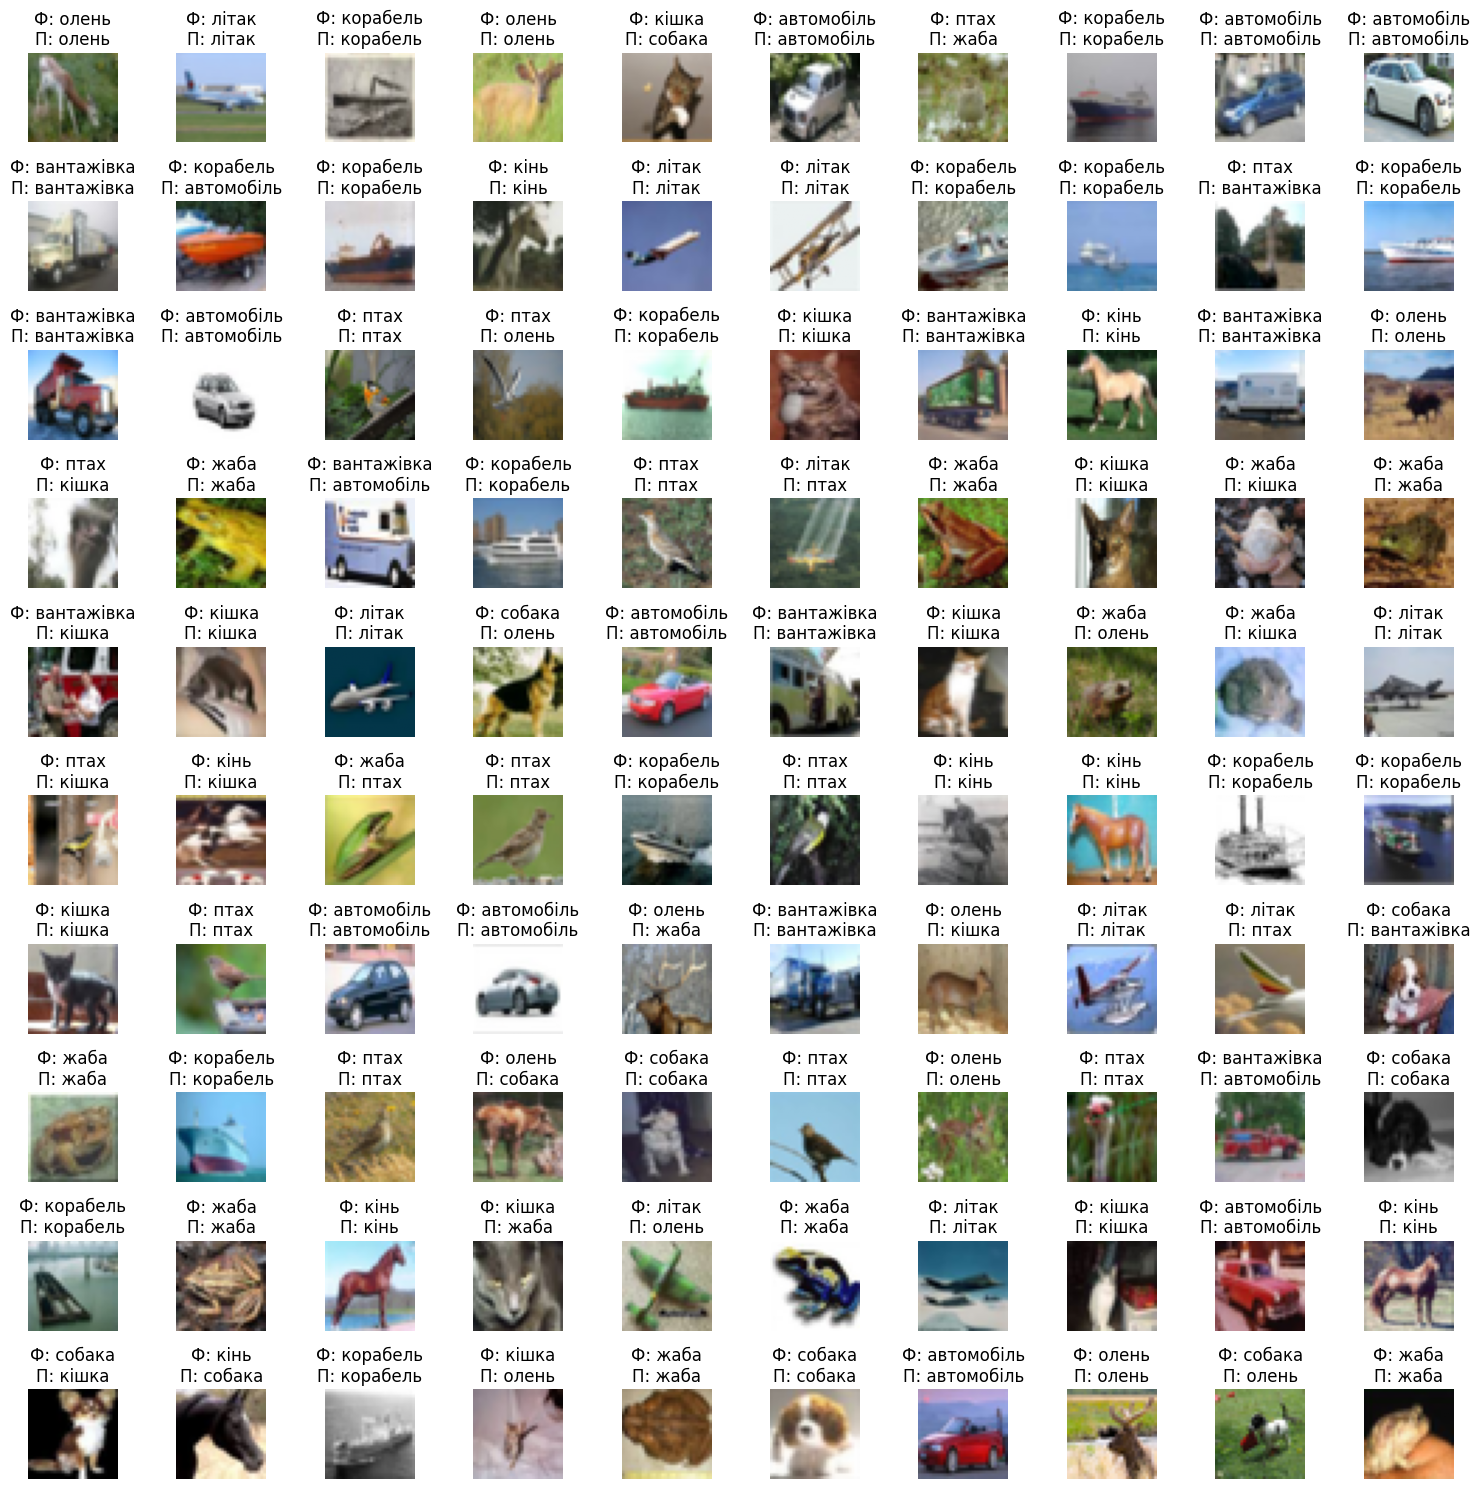

Точність на вибіркових зображеннях: 72.0 %


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# назв класів cifar10
class_labels = ['літак', 'автомобіль', 'птах', 'кішка', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

# вибір 100 випадкових зображень із тестової вибірки у cifar10
indices = np.random.choice(len(x_test), 100, replace=False)
sample_images = x_test[indices]
sample_labels = np.argmax(y_test[indices], axis=1)

# Прогнозування міток для цих зображень за допомогою моделі
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Виведення зображень та передбачень
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.flatten()

for i, (image, true_label, predicted_label) in enumerate(zip(sample_images, sample_labels, predicted_labels)):
    axes[i].imshow(image)
    true_class = class_labels[true_label]
    predicted_class = class_labels[predicted_label]
    axes[i].set_title(f"Ф: {true_class}\nП: {predicted_class}") # П-прогнозування, Ф-фактичне на картинці
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# розрахунок точності прогнозу на отриманних  зображеннях
correct_predictions = np.sum(predicted_labels == sample_labels)
total_predictions = len(sample_labels)
accuracy_on_sample = correct_predictions / total_predictions

# виведення точності прогнозу на зразках
print(f"Точність на вибіркових зображеннях: {accuracy_on_sample * 100:.1f} %")



In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
model.save('/content/drive/MyDrive/my_cnn_model.keras')


In [28]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/my_cnn_model.keras')


In [29]:
from google.colab import files
files.download('/content/drive/MyDrive/my_cnn_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Опрацювання зображення

Saving Aurora Ultimate 2560x1600.jpg to Aurora Ultimate 2560x1600 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


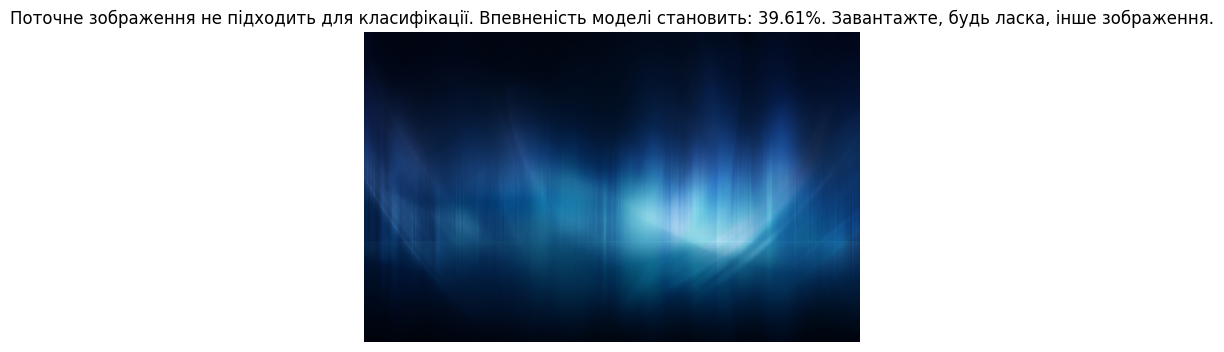

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


model = load_model('/content/drive/MyDrive/my_cnn_model.keras') # завантаження ШНМ, яка була створена

def preprocess_image(img):  # ф-ція для завантаження й попередньої обробки зображення користувача
    img = img.resize((32, 32))  # зміна розміру до 32x32
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# межа точності (чи впевненості) моделі у роспізнавані отриманної картинки
confidence_threshold = 0.75

# завантаження зображення через Colab
uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(filename)
    img_preprocessed = preprocess_image(img)
    prediction = model.predict(img_preprocessed)

    # отримання прогнозованого класу та впевненості
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]

    class_labels = ['літак', 'автомобіль', 'птах', 'кішка', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

    # Перевірка на поріг точності картинки прогнозованної із точністю пороговою
    if confidence >= confidence_threshold:
        result_text = f'На картинці зображено {class_labels[predicted_class]} із вірогідністю у {confidence * 100:.2f}%'
    else:
        result_text = f"Поточне зображення не підходить для класифікації. Впевненість моделі становить: {confidence * 100:.2f}%. Завантажте, будь ласка, інше зображення."

    # Виведення результатів разом із зображенням
    plt.figure()
    plt.imshow(img)
    plt.title(result_text)
    plt.axis('off')
    plt.show()


